<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [7]</a>'.</span>

In [ ]:
%load_ext autoreload
%load_ext autotime

time: 173 µs (started: 2024-12-12 22:17:20 -08:00)


In [2]:
import os
import sys
import time
import warnings
from bokeh.io import output_notebook

# Add WisIO to the path
sys.path.append(os.path.abspath("../"))

# Filter warnings
warnings.filterwarnings('ignore')

# Set the notebook to display Bokeh plots
output_notebook()

Loading BokehJS ...

time: 658 ms (started: 2024-12-12 22:17:20 -08:00)


In [3]:
analyzer = "dftracer"

run_dir = f".wisio/{analyzer}/{int(time.time())}"
bottleneck_dir = f"{run_dir}/bottlenecks"
checkpoint_dir = f"{run_dir}/checkpoints"

cluster = "external"
cluster_restart_on_connect = True
cluster_scheduler_address = "tcp://127.0.0.1:46423"

checkpoint = False
exclude_characteristics = ['node_count', 'app_count', 'proc_count', 'file_count']
logical_view_types = False
percentile = 0.95
time_granularity = 1e6
trace_path = "/p/lustre3/iopp/dftracer-traces-lfs/v1.0.5-develop/corona/cm1/APP/node-1/v1/RAW/*.pfw.gz"

app_metrics = [
    'intensity',
    'io_compute_per',
    # 'io_bw',
    # 'io_time_norm',
    # 'io_time_per',
    'ops',
    'time_norm',
    'time_per',
    # 'u_checkpoint_io_time',
    # 'u_io_time_per',
    # 'u_read_io_time',
]
dataloader_metrics = [
    'intensity',
    # 'io_bw',
    # 'io_time_norm',
    # 'io_time_per',
    'ops',
    # 'read_bw',
    'time_norm',
    'time_per',
    # 'write_bw',
]
posix_metrics = [
    'intensity',
    'data_bw',
    'data_time_norm',
    'data_time_per',
    'ops',
    # 'read_bw',
    'time_norm',
    'time_per',
    # 'write_bw',
]

app_view_types = ['proc_name', 'time_range']
dataloader_view_types = ['proc_name', 'time_range']
posix_view_types = ['proc_name', 'time_range']

time_view_type = 'time_range'
unoverlapped_posix_only = False

output_compact = False
output_group_behavior = False
output_max_bottlenecks = 1
output_root_only = True


time: 1.65 ms (started: 2024-12-12 22:17:29 -08:00)


In [4]:
# Parameters
analyzer = "dftracer"
# app_view_types = ["proc_name", "time_range"]
bottleneck_dir = "/p/lustre3/iopp/wisio-bottlenecks/dftracer-montage-pegasus-dss-2deg-node-16-proc_name-time_range"
checkpoint = True
checkpoint_dir = "/p/lustre3/iopp/wisio-checkpoints/dftracer-montage-pegasus-dss-2deg-node-16-proc_name-time_range"
cluster = "external"
cluster_restart_on_connect = True
cluster_scheduler_address = "tcp://127.0.0.1:36047"
# dataloader_view_types = ["proc_name", "time_range"]
logical_view_types = False
output_max_bottlenecks = 3
output_root_only = False
percentile = 0.6
# posix_view_types = ["proc_name", "time_range"]
run_dir = ".wisio/dftracer-montage-pegasus-dss-2deg-node-16-proc_name-time_range"
time_granularity = 1000000.0
trace_path = "/p/lustre3/iopp/dftracer-traces-lfs/v1.0.5-develop/corona/montage/pegasus-dss-2deg/node-16/v1/COMPACT/*.pfw.gz"

app_view_types = ["proc_name", "time_range"]
dataloader_view_types = ["proc_name", "time_range"]
posix_view_types = ["proc_name", "time_range"]

time: 1.23 ms (started: 2024-12-12 22:17:40 -08:00)


In [5]:
from distributed import Client
from hydra import compose, initialize
from hydra.core.hydra_config import HydraConfig
from hydra.utils import instantiate
from wisio.cluster import ExternalCluster
from wisio.config import init_hydra_config_store
from wisio.utils.file_utils import ensure_dir

ensure_dir(run_dir)

with initialize(version_base=None, config_path=None):
    init_hydra_config_store()
    cfg = compose(
        config_name="config",
        overrides=[
            f"+analyzer={analyzer}",
            f"analyzer.bottleneck_dir={bottleneck_dir}",
            f"analyzer.checkpoint={checkpoint}",
            f"analyzer.checkpoint_dir={checkpoint_dir}",
            f"analyzer.time_granularity={time_granularity}",
            # f"cluster={cluster}",
            # f"cluster.restart_on_connect={cluster_restart_on_connect}",
            # f"cluster.scheduler_address={cluster_scheduler_address}",
            "cluster=external",
            "cluster.scheduler_address=tcp://127.0.0.1:46065",
            f"exclude_characteristics=[{','.join(exclude_characteristics)}]",
            f"hydra.run.dir={run_dir}",
            f"hydra.runtime.output_dir={run_dir}",
            f"logical_view_types={logical_view_types}",
            f"output.compact={output_compact}",
            f"output.group_behavior={output_group_behavior}",
            f"output.max_bottlenecks={output_max_bottlenecks}",
            f"output.root_only={output_root_only}",
            f"percentile={percentile}",
            f"trace_path={trace_path}",
        ],
        return_hydra_config=True,
    )
    HydraConfig.instance().set_config(cfg)
    cluster = instantiate(cfg.cluster)
    if isinstance(cluster, ExternalCluster):
        client = Client(cluster.scheduler_address)
        if cluster.restart_on_connect:
            client.restart()
    else:
        client = Client(cluster)
    analyzer = instantiate(cfg.analyzer)
    output = instantiate(cfg.output)

time: 3.18 s (started: 2024-12-12 22:17:45 -08:00)


In [6]:
client.dashboard_link

'http://127.0.0.1:8787/status'

time: 6.21 ms (started: 2024-12-12 22:17:48 -08:00)


In [7]:
client.restart()

<Client: 'tcp://127.0.0.1:46065' processes=0 threads=0, memory=0 B>

time: 3.14 s (started: 2024-12-12 22:17:48 -08:00)


In [8]:
from wisio.constants import Layer

result = analyzer.analyze_trace(
    trace_path=cfg.trace_path,
    bottleneck_rules=cfg.bottleneck_rules,
    exclude_bottlenecks=cfg.exclude_bottlenecks,
    exclude_characteristics=cfg.exclude_characteristics,
    logical_view_types=cfg.logical_view_types,
    percentile=cfg.percentile,
    metrics={
        'dlio': app_metrics,
        'compute': app_metrics,
        'dataloader': dataloader_metrics,
        'image': dataloader_metrics,
        'reader': dataloader_metrics,
        'checkpoint': dataloader_metrics,
        'posix': posix_metrics,
    },
    time_view_type=time_view_type,
    unoverlapped_posix_only=unoverlapped_posix_only,
    view_types={
        'dlio': app_view_types,
        'compute': app_view_types,
        'dataloader': dataloader_view_types,
        'image': dataloader_view_types,
        'reader': dataloader_view_types,
        'checkpoint': dataloader_view_types,
        'posix': posix_view_types,
    },
)

time: 3min 27s (started: 2024-12-12 22:17:59 -08:00)


In [9]:
traces, hlms, main_views, metric_boundaries, views, flat_views = result

time: 686 µs (started: 2024-12-12 22:21:27 -08:00)


In [11]:
checkpoint_dir

'/p/lustre3/iopp/wisio-checkpoints/dftracer-montage-pegasus-dss-2deg-node-16-proc_name-time_range'

time: 2.36 ms (started: 2024-12-12 22:21:32 -08:00)


In [12]:
traces.to_parquet(f"{checkpoint_dir}/_traces", write_metadata_file=True)

time: 8.15 s (started: 2024-12-12 22:21:39 -08:00)


In [13]:
flat_views[('time_range',)][
    [
        'compute_time',
        'checkpoint_time',
        'dlio_compute_time',
        'dlio_stall_time',
        'dataloader_time',
        'dataloader_sample_time',
        'posix_time',
        'posix_read_lustre_time',
        'posix_read_ssd_time',
        'u_checkpoint_time',
        'u_dataloader_time',
        'u_dataloader_sample_time',
        'u_posix_time',
    ]
].sum()

compute_time                       0.0
checkpoint_time                    0.0
dlio_compute_time                  0.0
dlio_stall_time                    0.0
dataloader_time                    0.0
dataloader_sample_time             0.0
posix_time                  757.679468
posix_read_lustre_time       88.266871
posix_read_ssd_time                0.0
u_checkpoint_time                  0.0
u_dataloader_time                  0.0
u_dataloader_sample_time           0.0
u_posix_time                757.679468
dtype: double[pyarrow]

time: 6.85 ms (started: 2024-12-12 22:21:48 -08:00)


In [16]:
traces['cat'].value_counts().compute()

cat
STDIO       29901282
POSIX        3100327
dftracer       40354
Name: count, dtype: int64[pyarrow]

time: 4.13 s (started: 2024-12-02 11:29:23 -08:00)


In [17]:
traces['func_name'].value_counts().compute()

func_name
fread        17003482
fwrite        6151831
fclose        3362691
fopen         2948009
opendir       1139140
__xstat        768641
fopen64        433718
open           349939
close          345971
read           241220
write           85552
fork            38818
unlink          30401
end             20177
start           20177
dup2            19344
access          17201
__fxstat        15360
mkdir            9595
mmap             9216
ftruncate        7680
readlink         6912
__xstat64        6834
fcntl            2663
rmdir            2600
remove           1704
fseek            1551
lseek            1536
Name: count, dtype: int64[pyarrow]

time: 4.13 s (started: 2024-12-02 11:29:41 -08:00)


In [20]:
hlms['POSIX'].groupby('func_name')['io_cat'].first().compute()

func_name
__fxstat     3
__xstat      3
__xstat64    3
access       3
close        3
dup2         6
fclose       3
fcntl        3
fopen        3
fopen64      3
fork         4
fread        1
fseek        3
ftruncate    3
fwrite       2
lseek        3
mkdir        3
mmap         6
open         3
opendir      3
read         1
readlink     3
remove       6
rmdir        3
unlink       3
write        2
Name: io_cat, dtype: uint8[pyarrow]

time: 77.1 ms (started: 2024-12-02 11:30:32 -08:00)


In [10]:
flat_views[('time_range',)].to_csv('montage_dss2deg_node16_time_range.csv')

time: 249 ms (started: 2024-12-02 11:25:33 -08:00)


In [11]:
flat_views[('proc_name',)].to_csv('montage_dss2deg_node16_proc_name.csv')

time: 10.3 s (started: 2024-12-02 11:25:42 -08:00)


In [12]:
flat_views[('proc_name', 'host_name')].to_csv('montage_dss2deg_node16_host_name.csv')

time: 31.6 ms (started: 2024-12-02 11:25:52 -08:00)


In [13]:
flat_views[('proc_name', 'proc_id')].to_csv('montage_dss2deg_node16_proc_id.csv')

time: 5.62 s (started: 2024-12-02 11:26:00 -08:00)


In [14]:
flat_views[('time_range',)][
    [
        'compute_time',
        'checkpoint_time',
        'dlio_compute_time',
        'dlio_stall_time',
        'dlio_time',
        'dataloader_time',
        'dataloader_sample_time',
        'posix_time',
        'u_checkpoint_time',
        'u_dataloader_time',
        'u_dataloader_sample_time',
        'u_posix_time',
    ]
].sum()

compute_time                       0.0
checkpoint_time                    0.0
dlio_compute_time                  0.0
dlio_stall_time                    0.0
dlio_time                          0.0
dataloader_time                    0.0
dataloader_sample_time             0.0
posix_time                  757.679468
u_checkpoint_time                  0.0
u_dataloader_time                  0.0
u_dataloader_sample_time           0.0
u_posix_time                757.679468
dtype: double[pyarrow]

time: 6.29 ms (started: 2024-12-02 11:27:51 -08:00)


<Axes: xlabel='time_range'>

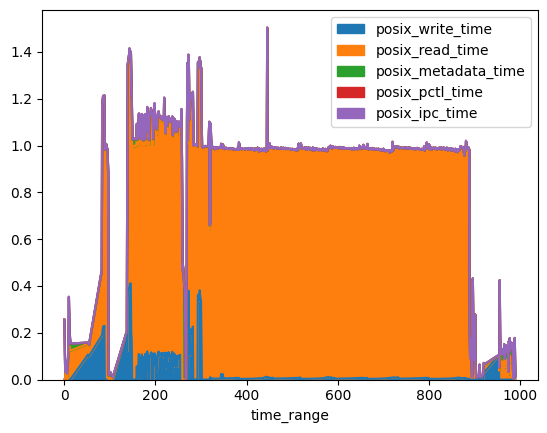

time: 232 ms (started: 2024-12-02 11:33:26 -08:00)


In [ ]:
flat_views[('time_range',)].sort_index()[
    # ['dlio_compute_time', 'dlio_stall_time', 'posix_time']
    [
        # 'compute_time',
        # 'dlio_compute_time',
        # 'dlio_stall_time',
        # 'checkpoint_time',
        # 'dataloader_time',
        # 'reader_time',
        # 'dataloader_sample_time',
        # 'posix_time',
        'posix_write_time',
        'posix_read_time',
        'posix_metadata_time',
        'posix_pctl_time',
        'posix_ipc_time',
        'posix_other_time',
    ]
].plot(kind='area')

In [9]:
result.head()

,cat,time,epoch,level,func_name,pid,step,te,tid,time_range,...,hhash,image_id,io_cat,phase,size,compute_time,checkpoint_time,read_time,hash,value
4,dftracer,0.0,<NA>,1,start,2137784,<NA>,319826000,2137784,319,...,29933,<NA>,6,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,STDIO,0.000583,<NA>,1,fopen64,2137784,<NA>,319830207,2137784,319,...,29933,<NA>,3,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,STDIO,0.001677,<NA>,1,fread,2137784,<NA>,319831898,2137784,319,...,29933,<NA>,1,0,2,<NA>,<NA>,<NA>,<NA>,<NA>
8,STDIO,0.000262,<NA>,1,fclose,2137784,<NA>,319832174,2137784,319,...,29933,<NA>,3,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,STDIO,0.000205,<NA>,1,fopen64,2137784,<NA>,319832407,2137784,319,...,29933,<NA>,3,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


time: 51.8 ms (started: 2024-12-02 11:09:13 -08:00)


In [19]:
analyzer.file_hash.compute()

,name,pid,tid,hhash
hash,,,,
847,./cposs2ukstu_red_007_002_area.fits,2137784,2137784,<NA>
2028,./cposs2ukstu_red_004_002_area.fits,2137784,2137784,<NA>
3029,./cposs2ukstu_red_002_002.fits,2137784,2137784,<NA>
6362,./cposs2ukstu_red_005_002.fits,2137784,2137784,<NA>
11642,./cposs2ukstu_red_005_002_area.fits,2137784,2137784,<NA>
...,...,...,...,...
24170,/dev/shm/ucx_shm_posix_4c40f138,98186,98186,<NA>
36244,/dev/shm/psm3_shm.35619.0x7700953b03:fe8000000...,98194,98194,<NA>
38976,/var/tmp/haridev/flux-aqB80S/jobtmp-5-f5HcTukL...,98198,98198,<NA>


time: 29.2 ms (started: 2024-12-02 11:14:37 -08:00)


In [13]:
analyzer.file_hash[['name']].rename(columns={'name': 'file_name'}).compute()

,file_name
hash,
847,./cposs2ukstu_red_007_002_area.fits
2028,./cposs2ukstu_red_004_002_area.fits
3029,./cposs2ukstu_red_002_002.fits
6362,./cposs2ukstu_red_005_002.fits
11642,./cposs2ukstu_red_005_002_area.fits
...,...
24170,/dev/shm/ucx_shm_posix_4c40f138
36244,/dev/shm/psm3_shm.35619.0x7700953b03:fe8000000...
38976,/var/tmp/haridev/flux-aqB80S/jobtmp-5-f5HcTukL...


time: 38.6 ms (started: 2024-12-02 11:09:47 -08:00)


In [18]:
analyzer.host_hash.compute()

,name,pid,tid,hhash
hash,,,,
29933,corona265,2137784,2137784,<NA>
27579,corona268,2202729,2202729,<NA>
10769,corona266,1394024,1394024,<NA>
56515,corona267,1967980,1967980,<NA>
13118,corona275,1971503,1971503,<NA>
33121,corona274,2199158,2199158,<NA>
39820,corona229,2473327,2473327,<NA>
42871,corona192,2583277,2583277,<NA>
36309,corona269,2828015,2828015,<NA>


time: 13.6 ms (started: 2024-12-02 11:11:32 -08:00)


In [29]:
analyzer.host_hash['hhash'].compute()

TypeError: string indices must be integers

time: 297 ms (started: 2024-12-02 11:20:02 -08:00)


In [14]:
analyzer.host_hash.set_index('hhash')[['name']].rename(columns={'name': 'host_name'})

TypeError: boolean value of NA is ambiguous

time: 1.91 s (started: 2024-12-02 11:10:09 -08:00)


In [ ]:
analyzer.write_bottlenecks(result.flat_bottlenecks)

In [ ]:
output.handle_result(metrics=[], result=result)

In [ ]:
bottlenecks = analyzer.read_bottlenecks()

In [ ]:
from bokeh.io import show
from wisio.plots import plot_bottleneck_summary

show(plot_bottleneck_summary(bottlenecks, groupby=('layer', 'view_name')))

In [ ]:
show(plot_bottleneck_summary(bottlenecks, groupby=('layer', 'view_name', 'metric')))